In [1]:
include("./Eigensolvers.jl")
using EigenSolvers
using PyPlot
srand(0);

In [2]:
d = 10

Lambda = ones(d)
Lambda[2:end] = 0.9

n = 10^6
A = randn(n,d)
Q,_ = qr(A)
A = randn(d,d)
U,_ = qr(A)
data = sqrt(n)*Q*diagm(sqrt(Lambda))*U'
A = data'*data/n

u1 = U[:,1]
u2 = U[:,2];

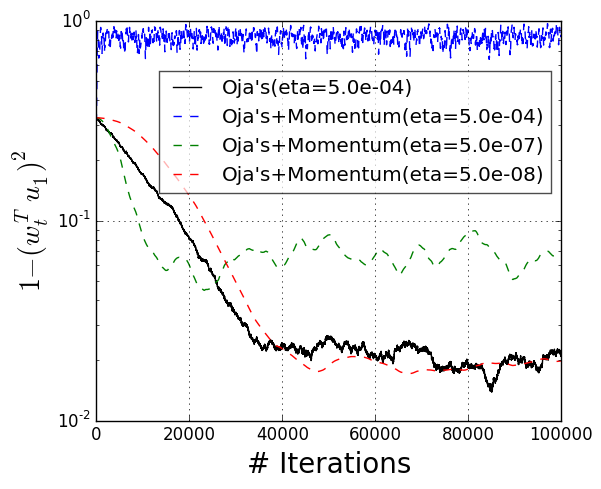

In [3]:
n,d = size(data)
w0 = randn(d)
w0 = w0/norm(w0)
x0 = w0
epoch = 1*10^5
num_trials = 10
eta = 5e-4
figure(figsize=(6,5))

res_sgd = zeros(epoch+1,num_trials)
for i = 1:num_trials
    res_sgd[:,i] = oja(data, x0, eta, epoch, u1, 1, i*10)    
end
semilogy(mean(res_sgd,2), "k-", label=@sprintf("Oja's(eta=%.1e)", eta))


for eta_m = [eta, eta/1000, eta/10000]
    beta_m = (1 + eta_m*Lambda[2])^2/4
    res_msgd = zeros(epoch+1,num_trials)
    for i = 1:num_trials
        res_msgd[:,i] = oja_m(data, x0, eta_m, beta_m, epoch, u1, 1,i*10+100)
    end
    semilogy(mean(res_msgd,2), "--",label=@sprintf("Oja's+Momentum(eta=%.1e)", eta_m))
end

legend(loc="upper right", bbox_to_anchor=(1, 0.9),framealpha=0.7)
xlabel("# Iterations", fontsize=20)
ylabel(L"$1 - (w_t^Tu_1)^2$", fontsize=20)
# ylim([1e-15,1])
grid("on")
savefig("no_acc.pdf",bbox_inches="tight")